# Preparing the "workspace"

In [7]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install pandas

In [12]:
pip install statsmodels


  Using cached scipy-1.7.3-cp39-cp39-win_amd64.whl (34.3 MB)


In [16]:
# Packages and data loading

import matplotlib.pyplot as pyplot
import pandas as pandas
import statsmodels.api as statsmodels

mdata = pandas.read_csv('./Marketing-Analysis-CUSTOMERS/dataset/Marketing-Customer-Value-Analysis.csv')

In [17]:
# Data size overview

mdata.shape

(9134, 24)

In [18]:
# Data overview

mdata.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


### Target

The desired output for the costumer engagement is the "Response" column, which isn't bumeric. <b>Logistic regression models "prefers"" numbers as values, thus we'll be applying a conversion</b>

In [19]:
# Converting the target/output variable into a numerical

mdata['Engaged'] = mdata['Response'].apply(lambda x: 0 if x == 'No' else 1)

## Examining Engagement Rate

Which is the percentage of customers that were exposed to the marketing

In [27]:
engagement_rate_data = pandas.DataFrame(mdata.groupby('Engaged').count()['Response'] / mdata.shape[0] * 100.0)

engagement_rate_data

,Response
Engaged,
0,85.679877
1,14.320123


There are more customers that did not engage with the marketing.

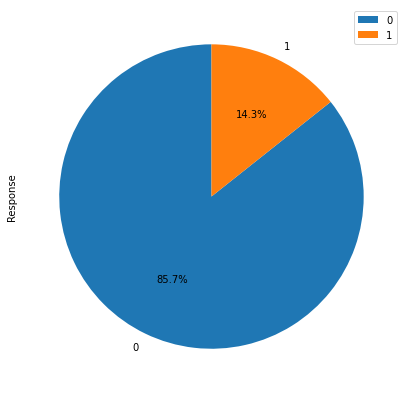

In [28]:
engagement_rate_data.plot(kind = 'pie', figsize =(15, 7), startangle = 90, subplots = True, autopct = lambda x: '%0.1f%%' % x)

pyplot.show()

## Total Claim Amounts

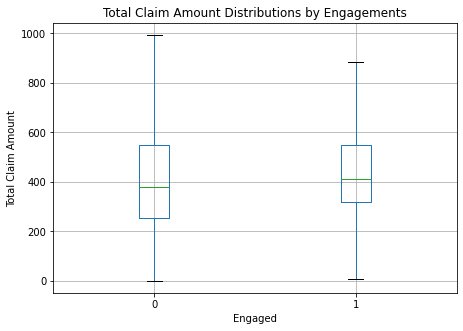

In [30]:
ax = mdata[['Engaged','Total Claim Amount']].boxplot(by = 'Engaged', showfliers = False, figsize = (7,5))

ax.set_xlabel('Engaged')
ax.set_ylabel('Total Claim Amount')
ax.set_title('Total Claim Amount Distributions by Engagements')

pyplot.suptitle("")
pyplot.show()

### Observation and Notes

Box plots are good method to view the distributions of continuous variables. 

The rectangles represent the first quartile to the third quartile, and the green line represent the median. 

The ends are the minimum and maximum values. 

The showfliers = false; allows to spot the suspected outliers like so

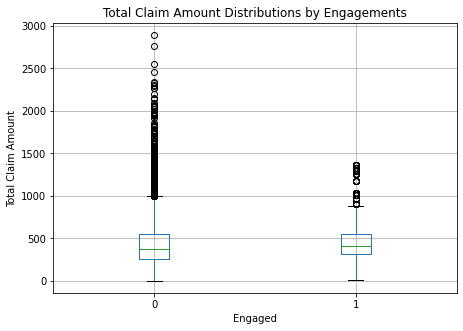

In [32]:
ax = mdata[['Engaged','Total Claim Amount']].boxplot(by = 'Engaged', showfliers = True, figsize = (7,5))

ax.set_xlabel('Engaged')
ax.set_ylabel('Total Claim Amount')
ax.set_title('Total Claim Amount Distributions by Engagements')

pyplot.suptitle("")
pyplot.show()

### Notes

The dots are the suspected outliers based on Interquartile range (IQR). 
The formula for suspected outliers are 

    - 1.5IQR above the third quartile or,
    - 1.5IQR below the first quartile.

## Regression analysis

In [33]:
# Examining the feature variables to see, 
# which fits in the logistic regression model.

mdata.dtypes


Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
Engaged         

In [34]:
continuous_vars = ['Customer Lifetime Value', 'Income', 'Monthly Premium Auto','Months Since Last Claim', 'Months Since Policy Inception', 'Number of Open Complaints', 'Number of Policies', 'Total Claim Amount']

In [35]:
# Transforming categorical variables 
# into numericals through factorizing

gender_values, gender_labels = mdata['Gender'].factorize()
print(gender_values)
print(gender_labels)

[0 0 0 ... 1 1 1]
Index(['F', 'M'], dtype='object')


### Notes

In factorization, the variables were turned into 1 or 0’s. But what if order matters? Then applying the Categorical function is also possible.

In [38]:
categories = pandas.Categorical(mdata['Education'], categories=['High school or Below', 'Bachelor', 'College', 'Master', 'Doctor'])

### Notes

0, 1, 2, 3, and 4 apply for the education of the High School or Below, Bachelor, College, Master, and Doctor respectively. 
This will allow fitting the data into a logistic model.

In [39]:
mdata['GenderFactorized'] = gender_values
mdata['EducationFactorized'] = categories.codes

In [41]:
# Combination of Categorical & Continuous

logit = statsmodels.Logit(mdata['Engaged'], mdata[['Customer Lifetime Value','Income','Monthly Premium Auto','Months Since Last Claim','Months Since Policy Inception','Number of Open Complaints','Number of Policies','Total Claim Amount','GenderFactorized','EducationFactorized']])

logit_fit = logit.fit()

logit_fit.summary()

Optimization terminated successfully.
         Current function value: 0.420740
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Engaged   No. Observations:                 9134
Model:                          Logit   Df Residuals:                     9124
Method:                           MLE   Df Model:                            9
Date:                Sun, 19 Dec 2021   Pseudo R-squ.:                -0.02437
Time:                        01:20:07   Log-Likelihood:                -3843.0
converged:                       True   LL-Null:                       -3751.6
Covariance Type:            nonrobust   LLR p-value:                     1.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Customer Lifetime Value        -6.77e-06   5.04e-06     -1.344      0.179   -1.66e-05     3.1e-06
Income                        -2.652e-06   1.04e-06     -2.557      0.011   -4.68e-06   -6.19e-07
Monthly Premium Auto             -0.0084      0.001     -6.852      0.000      -0.011      -0.006
Months Since Last Claim          -0.0197      0.003     -7.001      0.000      -0.025      -0.014
Months Since Policy Inception    -0.0058      0.001     -5.957      0.000      -0.008      -0.004
Number of Open Complaints        -0.0831      0.034     -2.428      0.015      -0.150      -0.016
Number of Policies               -0.0789      0.013     -6.175      0.000      -0.104      -0.054
Total Claim Amount                0.0002      0.000      1.142      0.253      -0.000       0.000
GenderFactorized                 -0.1542      0.058     -2.669      0.008      -0.268      -0.041
EducationFactorized               0.0235      0.020      1.160      0.246      -0.016       0.063
=================================================================================================
"""

### Notes

- z (short for z-score) is the number of standard deviations from the mean [3].

- The P>|z| (meaning p-value) states how likely to observe the relationship by chance. Normally, 0.05 is a standard cut-off for the p-value, and values less than 0.05 means lesser the chances of this relationship between input and the output variable to occur by coincidence. For example in numerical variables, we can see that Income, Monthly Premium Auto, Months Since Last Claim, Months Since Policy Inception, and Number of Policies variables have significant relationships with Engagement (output variable). If we look at the Months Since Last Claim variable, it is significant (very low p-value) and is negatively correlated (big negative z-score) with engagement. 

In other words, as more months pass after a claim, customers are less likely to engage with marketing.

From the categorical variables, we can see that males (0’s) are less likely to engage with marketing and the same applies to lower education (0 was for high school and went up 4 for doctorate).

## Conclusion

Engagement rates were in tabular form, sales channels were in pie charts for easier interpretation, total claim amounts in box plots to see ranges and potential outliers, and regression analysis were to find strong trends. 

Instead of using logistic regression as a predictive model in the output, it was leveraged to isolate trends then prepared as a potential feed for another machine learning model.